In [1]:
# 代码块按顺序执行即可
# 导入库
import pickle 
import numpy as np
import pandas as pd
import random, math
import datetime,time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

from osgeo import gdal
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 

from sklearn import svm 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import gaussian_kde
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# 导入数据集（这里换成自己的数据集即可）
df = pd.read_excel(r"D:\Program Files\科研\论文\Paper 6 AutoKDFC\数据集/Guangxi_banana_new.xlsx")

In [3]:
# 删除Id（数据集中是否有无效的特征，删除即可，若有多个在方括号里补充即可，例如：df.drop(['Id', 'XX', 'XX'], axis = 1)）
df = df.drop(['Id'], axis = 1)

In [4]:
# 查看数据表
df

,Labels,ARI,CARI,CIgreen,CIRE,NDVI,NDRE,SIPI,SIPIRE,Blue,Green,Red,NIR,Red edge
0,0,0.678162,0.328123,1.072893,0.560837,0.561460,0.215039,0.813379,0.642861,0.304635,0.363824,0.207799,0.744887,0.479593
1,0,0.709217,0.314551,0.854550,0.416058,0.537469,0.163868,0.819946,0.695210,0.260782,0.347091,0.186195,0.619978,0.450305
2,0,0.615828,0.282146,0.798565,0.413792,0.507630,0.159201,0.696103,0.519306,0.325546,0.365006,0.204162,0.629438,0.457653
3,0,0.615068,0.253007,0.701694,0.369188,0.547072,0.148419,0.713509,0.545311,0.270727,0.330477,0.158799,0.542579,0.405425
4,0,0.693861,0.300674,0.863526,0.436276,0.558581,0.171562,0.751131,0.591470,0.293303,0.354391,0.179361,0.630103,0.450743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.607989,0.292632,0.411492,0.092874,0.438339,0.036942,0.828448,1.120958,0.257037,0.403776,0.213772,0.543317,0.507867
116,1,0.555811,0.314953,0.281394,-0.023460,0.303075,-0.025925,1.231239,1.067316,0.296718,0.470366,0.305005,0.559273,0.601588
117,1,0.505404,0.282932,0.278225,0.007819,0.277158,-0.007061,1.551359,0.778248,0.296519,0.444754,0.309628,0.542549,0.561065
118,1,0.607582,0.311886,0.329870,0.006391,0.331447,-0.009462,0.952174,0.733323,0.315793,0.443215,0.273396,0.540663,0.558909


In [5]:
# 查看标签的分布情况，1：染病；0：健康。
df['Labels'].value_counts()

1    62
0    58
Name: Labels, dtype: int64

In [6]:
# 查看数据维度
df.shape

(120, 14)

# 模型Ⅰ

In [7]:
# 模型Ⅰ
df1 = df.copy() # BFs（13）
df2 = df.copy() # BFs + EFs（23）

In [8]:
# 基于BFs（5个反射率特征和8个植被指数特征，共13个特征）的RF、SVM和GNB的实验结果
X = df1.drop(['Labels'], axis = 1).values
y = df1['Labels'].values

oa_rf_list=[]
pre_rf_list=[]
rc_rf_list=[]
f1_rf_list=[]

oa_svm_list=[]
pre_svm_list=[]
rc_svm_list=[]
f1_svm_list=[]

oa_gnb_list=[]
pre_gnb_list=[]
rc_gnb_list=[]
f1_gnb_list=[]

for i in range(50): 
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  
    # 训练分类器（以随机森林为例）并输出预测结果  
    rf = RandomForestClassifier(random_state=42)  
    rf.fit(X_train, y_train)  
    y_pred_rf = rf.predict(X_test)  
  
    oa_rf=accuracy_score(y_test,y_pred_rf).round(5)
    oa_rf_list.append(oa_rf) 
    pre_rf=precision_score(y_test,y_pred_rf).round(5)
    pre_rf_list.append(pre_rf)
    rc_rf=recall_score(y_test,y_pred_rf).round(5)
    rc_rf_list.append(rc_rf)  
    f1_rf=f1_score(y_test,y_pred_rf).round(5)
    f1_rf_list.append(f1_rf)  
    
    SVM = svm.SVC(random_state=42)
    SVM.fit(X_train, y_train)
    y_pred_svm=SVM.predict(X_test)
    
    oa_svm=accuracy_score(y_test,y_pred_svm).round(5)
    oa_svm_list.append(oa_svm)
    pre_svm=precision_score(y_test,y_pred_svm).round(5)
    pre_svm_list.append(pre_svm)
    rc_svm=recall_score(y_test,y_pred_svm).round(5)
    rc_svm_list.append(rc_svm)  
    f1_svm=f1_score(y_test,y_pred_svm).round(5)
    f1_svm_list.append(f1_svm) 

    gnb = GaussianNB()  
    gnb.fit(X_train, y_train)
    y_pred_gnb=gnb.predict(X_test)
    
    oa_gnb=accuracy_score(y_test,y_pred_gnb).round(5)
    oa_gnb_list.append(oa_gnb)
    pre_gnb=precision_score(y_test,y_pred_gnb).round(5)
    pre_gnb_list.append(pre_gnb)
    rc_gnb=recall_score(y_test,y_pred_gnb).round(5)
    rc_gnb_list.append(rc_gnb)  
    f1_gnb=f1_score(y_test,y_pred_gnb).round(5)
    f1_gnb_list.append(f1_gnb) 
    
oa_rf_mean = np.mean(oa_rf_list).round(4)
pre_rf_mean = np.mean(pre_rf_list).round(4)
rc_rf_mean = np.mean(rc_rf_list).round(4)
f1_rf_mean = np.mean(f1_rf_list).round(4)
print('随机森林模型的准确率为',oa_rf_mean)
print('随机森林模型的精准率为',pre_rf_mean)
print('随机森林模型的召回率为',rc_rf_mean)
print('随机森林模型的F1_Score为',f1_rf_mean)
print("———————————————————————————————————————————————")

oa_svm_mean = np.mean(oa_svm_list).round(4)  
pre_svm_mean = np.mean(pre_svm_list).round(4)
rc_svm_mean = np.mean(rc_svm_list).round(4) 
f1_svm_mean = np.mean(f1_svm_list).round(4)
print('SVM模型的准确率为',oa_svm_mean)
print('SVM模型的精准率为',pre_svm_mean)
print('SVM模型的召回率为',rc_svm_mean)
print('SVM模型的F1_Score为',f1_svm_mean)
print("———————————————————————————————————————————————")

oa_gnb_mean = np.mean(oa_gnb_list).round(4)  
pre_gnb_mean = np.mean(pre_gnb_list).round(4)
rc_gnb_mean = np.mean(rc_gnb_list).round(4)  
f1_gnb_mean = np.mean(f1_gnb_list).round(4)
print('GNB模型的准确率为',oa_gnb_mean)
print('GNB模型的精准率为',pre_gnb_mean)
print('GNB模型的召回率为',rc_gnb_mean)
print('GNB模型的F1_Score为',f1_gnb_mean)

随机森林模型的准确率为 0.8978
随机森林模型的精准率为 0.9089
随机森林模型的召回率为 0.8902
随机森林模型的F1_Score为 0.8976
———————————————————————————————————————————————
SVM模型的准确率为 0.8872
SVM模型的精准率为 0.9032
SVM模型的召回率为 0.8746
SVM模型的F1_Score为 0.8864
———————————————————————————————————————————————
GNB模型的准确率为 0.8678
GNB模型的精准率为 0.9232
GNB模型的召回率为 0.813
GNB模型的F1_Score为 0.8613


# BFs的核密度分析

## 反射率BFs的核密度分析 

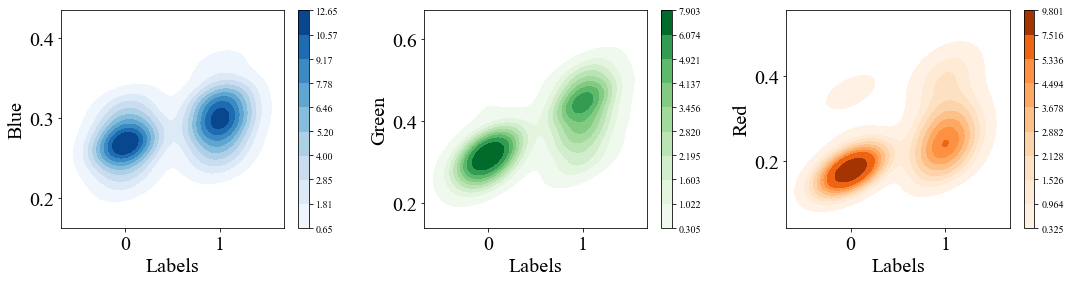

In [9]:
plt.rcParams['font.family'] = 'Times New Roman'  

fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(18, 4)
sns.kdeplot(x="Labels",y="Blue",data=df,ax=axes[0],shade=True,cbar=True,cmap='Blues');
sns.kdeplot(x="Labels",y="Green",data=df,ax=axes[1],shade=True,cbar=True,cmap='Greens');
sns.kdeplot(x="Labels",y="Red",data=df,ax=axes[2],shade=True,cbar=True,cmap='Oranges');

# 设置坐标轴刻度字体大小  
axes[0].tick_params(axis='both', labelsize=20)    
axes[1].tick_params(axis='both', labelsize=20)   
axes[2].tick_params(axis='both', labelsize=20)  

# 隐藏纵坐标刻度值  
# axes[0].set_yticklabels([])    
# axes[1].set_yticklabels([])    
# axes[2].set_yticklabels([])  
  
# 设置坐标轴标签字体大小  
axes[0].set_xlabel('Labels', fontsize=20)  
axes[1].set_xlabel('Labels', fontsize=20)   
axes[2].set_xlabel('Labels', fontsize=20)   
axes[0].set_ylabel('Blue', fontsize=20)   
axes[1].set_ylabel('Green', fontsize=20)    
axes[2].set_ylabel('Red', fontsize=20)    

# 调整子图间距  
fig.subplots_adjust(wspace=0.3, hspace=0.3)  


plt.show()

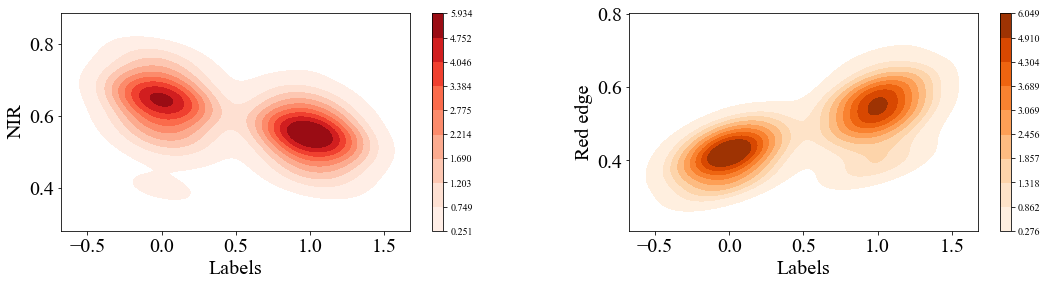

In [10]:
plt.rcParams['font.family'] = 'Times New Roman'  

fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18, 4)
sns.kdeplot(x="Labels",y="NIR",data=df,ax=axes[0],shade=True,cbar=True,cmap='Reds');
sns.kdeplot(x="Labels",y="Red edge",data=df,ax=axes[1],shade=True,cbar=True,cmap='Oranges');
#sns.kdeplot(x="Labels",y="MEAN_b3",data=df,ax=axes[2],shade=True,cbar=True,cmap='Greens');

# 设置坐标轴刻度字体大小  
axes[0].tick_params(axis='both', labelsize=20)    
axes[1].tick_params(axis='both', labelsize=20)   
#axes[2].tick_params(axis='both', labelsize=20)  

# 隐藏纵坐标刻度值  
# axes[0].set_yticklabels([])    
# axes[1].set_yticklabels([])    
# axes[2].set_yticklabels([])  
  
# 设置坐标轴标签字体大小  
axes[0].set_xlabel('Labels', fontsize=20)  
axes[1].set_xlabel('Labels', fontsize=20)   
#axes[2].set_xlabel('Labels', fontsize=20)   
axes[0].set_ylabel('NIR', fontsize=20)   
axes[1].set_ylabel('Red edge', fontsize=20)    
#axes[2].set_ylabel('MEAN_b3', fontsize=20)    

# 调整子图间距  
fig.subplots_adjust(wspace=0.3, hspace=0.3)  


plt.show()

## 植被指数BFs的核密度分析 

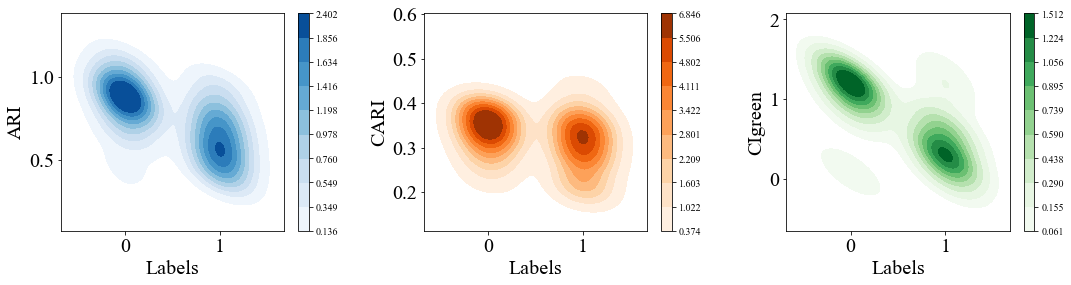

In [11]:
plt.rcParams['font.family'] = 'Times New Roman'  

fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(18, 4)
sns.kdeplot(x="Labels",y="ARI",data=df,ax=axes[0],shade=True,cbar=True,cmap='Blues');
sns.kdeplot(x="Labels",y="CARI",data=df,ax=axes[1],shade=True,cbar=True,cmap='Oranges');
sns.kdeplot(x="Labels",y="CIgreen",data=df,ax=axes[2],shade=True,cbar=True,cmap='Greens');

# 设置坐标轴刻度字体大小  
axes[0].tick_params(axis='both', labelsize=20)    
axes[1].tick_params(axis='both', labelsize=20)   
axes[2].tick_params(axis='both', labelsize=20)  
  
# 设置坐标轴标签字体大小  
axes[0].set_xlabel('Labels', fontsize=20)  
axes[1].set_xlabel('Labels', fontsize=20)   
axes[2].set_xlabel('Labels', fontsize=20)   
axes[0].set_ylabel('ARI', fontsize=20)   
axes[1].set_ylabel('CARI', fontsize=20)    
axes[2].set_ylabel('CIgreen', fontsize=20)    

# 调整子图间距  
fig.subplots_adjust(wspace=0.3, hspace=0.3)  

plt.show()

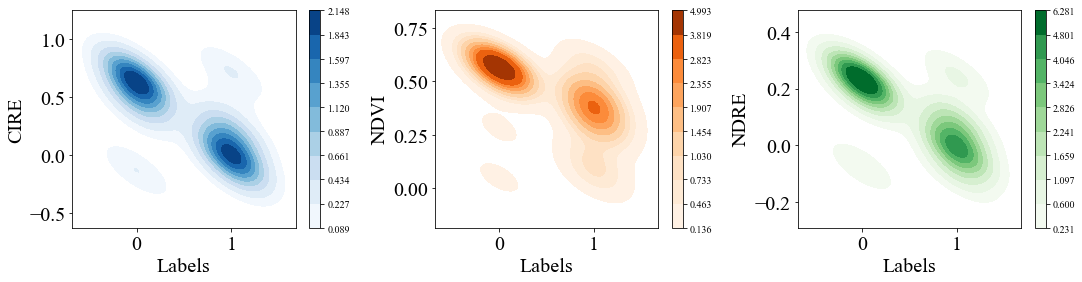

In [12]:
plt.rcParams['font.family'] = 'Times New Roman'  

fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(18, 4)
sns.kdeplot(x="Labels",y="CIRE",data=df,ax=axes[0],shade=True,cbar=True,cmap='Blues');
sns.kdeplot(x="Labels",y="NDVI",data=df,ax=axes[1],shade=True,cbar=True,cmap='Oranges');
sns.kdeplot(x="Labels",y="NDRE",data=df,ax=axes[2],shade=True,cbar=True,cmap='Greens');

# 设置坐标轴刻度字体大小  
axes[0].tick_params(axis='both', labelsize=20)    
axes[1].tick_params(axis='both', labelsize=20)   
axes[2].tick_params(axis='both', labelsize=20)  
  
# 设置坐标轴标签字体大小  
axes[0].set_xlabel('Labels', fontsize=20)  
axes[1].set_xlabel('Labels', fontsize=20)   
axes[2].set_xlabel('Labels', fontsize=20)   
axes[0].set_ylabel('CIRE', fontsize=20)   
axes[1].set_ylabel('NDVI', fontsize=20)    
axes[2].set_ylabel('NDRE', fontsize=20)    

# 调整子图间距  
fig.subplots_adjust(wspace=0.3, hspace=0.3)  

plt.show()

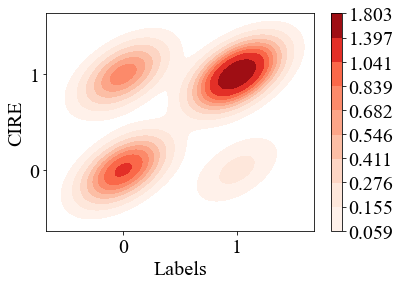

In [68]:
# 设置字体
plt.rcParams['font.family'] = 'Times New Roman'

# 生成 KDE 图
fig, ax = plt.subplots(figsize=(6, 4))
kde = sns.kdeplot(x="Labels", y="NIR_EF", data=df2, ax=ax, shade=True, cbar=True, cmap='Reds')

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)

# 设置 y 轴刻度为 0 和 1
ax.set_yticks([0, 1])
ax.set_yticklabels(['0', '1'], fontsize=20)

# 设置坐标轴刻度字体大小
ax.tick_params(axis='both', labelsize=20)

# 设置坐标轴标签字体大小
ax.set_xlabel('Labels', fontsize=20)
ax.set_ylabel('CIRE', fontsize=20)

plt.show()

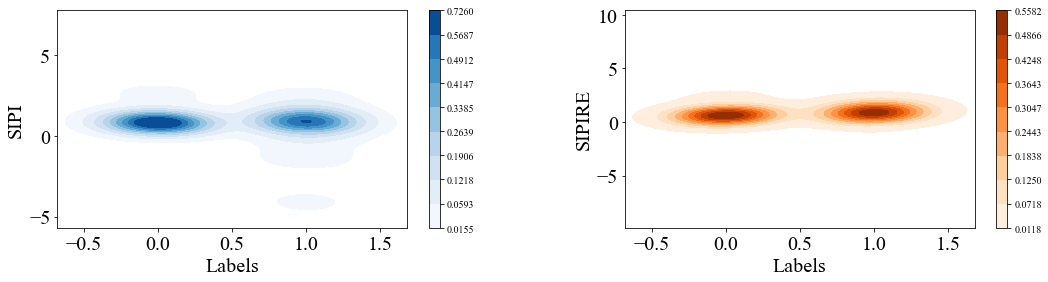

In [13]:
plt.rcParams['font.family'] = 'Times New Roman'  

fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18, 4)
sns.kdeplot(x="Labels",y="SIPI",data=df,ax=axes[0],shade=True,cbar=True,cmap='Blues');
sns.kdeplot(x="Labels",y="SIPIRE",data=df,ax=axes[1],shade=True,cbar=True,cmap='Oranges');

# 设置坐标轴刻度字体大小  
axes[0].tick_params(axis='both', labelsize=20)    
axes[1].tick_params(axis='both', labelsize=20)   
#axes[2].tick_params(axis='both', labelsize=20)  

# 隐藏纵坐标刻度值  
# axes[0].set_yticklabels([])    
# axes[1].set_yticklabels([])    
# axes[2].set_yticklabels([])  
  
# 设置坐标轴标签字体大小  
axes[0].set_xlabel('Labels', fontsize=20)  
axes[1].set_xlabel('Labels', fontsize=20)   
#axes[2].set_xlabel('Labels', fontsize=20)   
axes[0].set_ylabel('SIPI', fontsize=20)   
axes[1].set_ylabel('SIPIRE', fontsize=20)    
#axes[2].set_ylabel('CIgreen', fontsize=20)    

# 调整子图间距  
fig.subplots_adjust(wspace=0.3, hspace=0.3)   

plt.show()

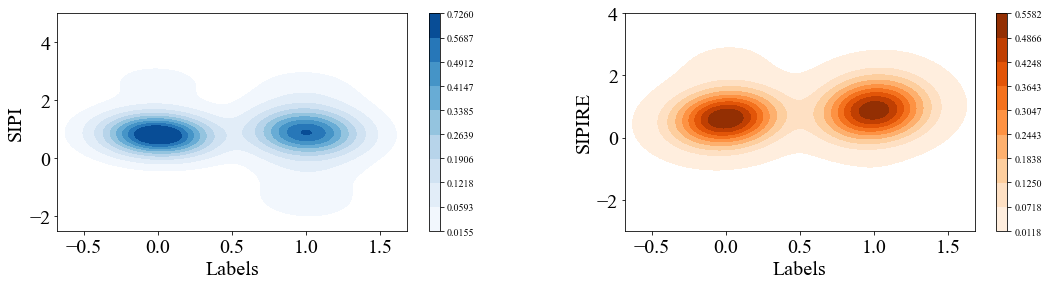

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体
plt.rcParams['font.family'] = 'Times New Roman'

# 创建子图
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

# 绘制核密度图
sns.kdeplot(x="Labels", y="SIPI", data=df, ax=axes[0], shade=True, cbar=True, cmap='Blues')
sns.kdeplot(x="Labels", y="SIPIRE", data=df, ax=axes[1], shade=True, cbar=True, cmap='Oranges')

# 设置y轴范围
axes[0].set_ylim(-2.5, 5)
axes[1].set_ylim(-3, 4)

# 设置坐标轴刻度字体大小
axes[0].tick_params(axis='both', labelsize=20)
axes[1].tick_params(axis='both', labelsize=20)

# 设置坐标轴标签字体大小
axes[0].set_xlabel('Labels', fontsize=20)
axes[1].set_xlabel('Labels', fontsize=20)
axes[0].set_ylabel('SIPI', fontsize=20)
axes[1].set_ylabel('SIPIRE', fontsize=20)

# 调整子图间距
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

# AutoKDFC算法

## 核密度易分

In [11]:
import numpy as np  
from sklearn.metrics import f1_score  
from sklearn.model_selection import StratifiedKFold  
  
features = ['NIR', 'CIgreen', 'CIRE', 'NDVI', 'NDRE', 'ARI']  
true_labels = df['Labels'].values  
  
# 初始化性能度量字典  
f1_scores_dict = {feature: [] for feature in features}  
optimal_thresholds_dict = {feature: [] for feature in features}  
  
# 为每个特征生成阈值候选  
for feature in features:  
    if feature in df.columns:  
        min_val = df[feature].min()  
        max_val = df[feature].max()  
        threshold_candidates = np.linspace(min_val, max_val, num=1000)  
  
    # 使用K折交叉验证  
    k = 5  
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)  
  
    BFs_values = df[feature].values  
  
    # 初始化性能度量列表  
    f1_scores = []  
    optimal_thresholds = []  
  
    for train_idx, val_idx in skf.split(BFs_values, true_labels):  
        BFs_train, BFs_val = BFs_values[train_idx], BFs_values[val_idx]  
        labels_train, labels_val = true_labels[train_idx], true_labels[val_idx]  
  
        f1_scores_cv = []  
        for threshold in threshold_candidates:  
            predicted_labels_val = (BFs_val < threshold).astype(int)  
            f1 = f1_score(labels_val, predicted_labels_val)  
            f1_scores_cv.append(f1)  
  
        # 找到最大F1分数的阈值  
        max_f1_idx = np.argmax(f1_scores_cv)  
        optimal_threshold = threshold_candidates[max_f1_idx]  
        optimal_thresholds.append(optimal_threshold)  
        f1_scores.append(f1_scores_cv[max_f1_idx])  
  
    # 存储结果到字典中  
    f1_scores_dict[feature] = f1_scores  
    optimal_thresholds_dict[feature] = optimal_thresholds  
    
# 计算平均F1分数和最优阈值（对每个特征）   
for feature in features:  
    mean_f1_score = np.mean(f1_scores_dict[feature])   
    optimal_threshold = np.mean(optimal_thresholds_dict[feature])  
    print(f"Feature: {feature}")  
    print(f"Mean F1 score: {mean_f1_score:.4f}")  
    print(f"Optimal threshold (median): {optimal_threshold:.4f}")
    print()  # 打印空行以分隔不同特征的结果 

Feature: NIR
Mean F1 score: 0.8247
Optimal threshold (median): 0.6092

Feature: CIgreen
Mean F1 score: 0.9091
Optimal threshold (median): 0.7049

Feature: CIRE
Mean F1 score: 0.9176
Optimal threshold (median): 0.3009

Feature: NDVI
Mean F1 score: 0.9199
Optimal threshold (median): 0.4804

Feature: NDRE
Mean F1 score: 0.9176
Optimal threshold (median): 0.1192

Feature: ARI
Mean F1 score: 0.8436
Optimal threshold (median): 0.8291



In [10]:
import numpy as np
from sklearn.neighbors import KernelDensity

# 特征列表
features = ['NIR', 'CIgreen', 'CIRE', 'NDVI', 'NDRE', 'ARI', 'CARI', 'SIPI', 'SIPIRE', 'Blue', 'Green', 'Red', 'Red edge']

# 提取健康和染病样本数据
healthy_samples = df[df['Labels'] == 0]
diseased_samples = df[df['Labels'] == 1]

# 核密度估计函数
def estimate_density_and_mode(data, bandwidth=0.1, num_points=1000):
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(data[:, None])
    x_range = np.linspace(data.min(), data.max(), num_points)
    log_density = kde.score_samples(x_range[:, None])
    density = np.exp(log_density)

    # 找到核密度最大值点（Mode）
    mode_index = np.argmax(density)
    mode_value = x_range[mode_index]

    return x_range, density, mode_value

# 结果存储字典
results = {}

# 遍历每个特征
for feature in features:
    if feature in df.columns:
        # 健康和染病样本的特征值
        healthy_values = healthy_samples[feature].values
        diseased_values = diseased_samples[feature].values

        # 核密度估计及模值
        _, _, mode_healthy = estimate_density_and_mode(healthy_values)
        _, _, mode_diseased = estimate_density_and_mode(diseased_values)

        # 计算模值之间的距离
        mode_distance = np.abs(mode_healthy - mode_diseased)

        # 计算健康和染病组的标准差
        std_healthy = np.std(healthy_values)
        std_diseased = np.std(diseased_values)
        total_std = std_healthy + std_diseased

        # 计算 Discriminability Score
        discriminability_score = mode_distance / total_std if total_std > 0 else np.nan

        # 存储结果
        results[feature] = {
            "Mode Distance": mode_distance,
            "Total Std": total_std,
            "Discriminability Score": discriminability_score
        }

        # 打印结果
        print(f"Feature: {feature}")
        print(f"Mode Distance: {mode_distance:.4f}")
        print(f"Total Std: {total_std:.4f}")
        print(f"Discriminability Score: {discriminability_score:.4f}")
        print()

# 结果汇总
print("Summary of Results:")
for feature, metrics in results.items():
    print(f"{feature}: Mode Distance = {metrics['Mode Distance']:.4f}, "
          f"Total Std = {metrics['Total Std']:.4f}, "
          f"Discriminability Score = {metrics['Discriminability Score']:.4f}")

Feature: NIR
Mode Distance: 0.0905
Total Std: 0.1396
Discriminability Score: 0.6478

Feature: CIgreen
Mode Distance: 0.9318
Total Std: 0.6351
Discriminability Score: 1.4672

Feature: CIRE
Mode Distance: 0.6213
Total Std: 0.4342
Discriminability Score: 1.4310

Feature: NDVI
Mode Distance: 0.1871
Total Std: 0.2488
Discriminability Score: 0.7519

Feature: NDRE
Mode Distance: 0.2206
Total Std: 0.1716
Discriminability Score: 1.2851

Feature: ARI
Mode Distance: 0.3029
Total Std: 0.3178
Discriminability Score: 0.9532

Feature: CARI
Mode Distance: 0.0344
Total Std: 0.1096
Discriminability Score: 0.3135

Feature: SIPI
Mode Distance: 0.0206
Total Std: 1.6734
Discriminability Score: 0.0123

Feature: SIPIRE
Mode Distance: 0.1949
Total Std: 2.2919
Discriminability Score: 0.0851

Feature: Blue
Mode Distance: 0.0267
Total Std: 0.0597
Discriminability Score: 0.4466

Feature: Green
Mode Distance: 0.1095
Total Std: 0.1152
Discriminability Score: 0.9512

Feature: Red
Mode Distance: 0.0813
Total Std: 0.11

## 核密度可分

In [36]:
# import numpy as np
# import pandas as pd
# from sklearn.metrics import f1_score
# from collections import Counter

# features = ['Green', 'Red', 'Red edge', 'NIR', 'Blue']
# true_labels = df['Labels'].values

# def evaluate_threshold(threshold, feature_values, feature_name):
#     if feature_name == 'NIR':
#         predicted_labels = (feature_values < threshold).astype(int)
#     else:
#         predicted_labels = (feature_values > threshold).astype(int)
#     return f1_score(true_labels, predicted_labels, average='binary')

# def get_mode_value(feature_values, labels, target_label):
#     filtered_values = feature_values[labels == target_label]
#     counter = Counter(filtered_values.tolist())
#     return counter.most_common(1)[0][0] if counter else np.nan

# def binary_search_threshold_for_feature(feature_values, labels, feature_name, tolerance=1e-5, max_iter=100):
#     # 计算健康（Labels == 0）和染病（Labels == 1）的峰值（出现次数最多的值）
#     BFs_min = get_mode_value(feature_values, labels, 0)  # 健康峰值
#     BFs_max = get_mode_value(feature_values, labels, 1)  # 染病峰值
    
#     # 处理可能的 NaN 值
#     if np.isnan(BFs_min) or np.isnan(BFs_max):
#         return None, None
    
#     # 确保 BFs_max 是较大的那个值
#     if BFs_min > BFs_max:
#         BFs_min, BFs_max = BFs_max, BFs_min
    
#     best_threshold = None
#     best_f1 = -1

#     for _ in range(max_iter):
#         threshold = (BFs_min + BFs_max) / 2
#         f1_val = evaluate_threshold(threshold, feature_values, feature_name)

#         if f1_val > best_f1:
#             best_threshold = threshold
#             best_f1 = f1_val

#         if BFs_max - BFs_min < tolerance:
#             break
#         elif f1_val >= evaluate_threshold(BFs_min, feature_values, feature_name):
#             BFs_min = threshold
#         else:
#             BFs_max = threshold

#     return best_threshold, best_f1

# # 对每个特征执行二分查找
# for feature_name in features:
#     if feature_name in df.columns:
#         feature_values = df[feature_name].values
#         best_threshold, best_f1 = binary_search_threshold_for_feature(feature_values, df['Labels'].values, feature_name)
#         print(f"Optimal threshold for {feature_name}: {best_threshold:.4f}")
#         print(f"F1 score at optimal threshold for {feature_name}: {best_f1:.4f}")
#         print()
#     else:
#         print(f"Feature '{feature_name}' not found in the DataFrame.")

In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from collections import Counter

features = ['Green', 'Red', 'Red edge', 'NIR', 'Blue']
true_labels = df['Labels'].values

def evaluate_threshold(threshold, feature_values, feature_name):
    if feature_name == 'NIR':
        predicted_labels = (feature_values < threshold).astype(int)
    else:
        predicted_labels = (feature_values > threshold).astype(int)
    return f1_score(true_labels, predicted_labels, average='binary') 
   
# 二分查找函数，用于单个特征   
def binary_search_threshold_for_feature(feature_values,  feature_name, tolerance=1e-5, max_iter=100):       
    BFs_min = np.min(feature_values)     
    BFs_max = np.max(feature_values)     
    best_threshold = None       
    best_f1 = -1       
   
    for _ in range(max_iter):       
        threshold = (BFs_min + BFs_max) / 2       
        f1_val = evaluate_threshold(threshold, feature_values, feature_name)       
   
        if f1_val > best_f1:       
            best_threshold = threshold       
            best_f1 = f1_val       
   
        if BFs_max - BFs_min < tolerance:       
            break       
        elif f1_val >= evaluate_threshold(BFs_min, feature_values, feature_name):       
            BFs_min = threshold       
        else:       
            BFs_max = threshold       
   
    return best_threshold, best_f1     
   
# 对每个特征执行二分查找   
for feature_name in features:  # 使用features列表中的特征名称   
    if feature_name in df.columns:  # 确保特征在DataFrame中   
        feature_values = df[feature_name].values   
        best_threshold, best_f1 = binary_search_threshold_for_feature(feature_values, feature_name)   
        print(f"Optimal threshold for {feature_name}: {best_threshold:.4f}")       
        print(f"F1 score at optimal threshold for {feature_name}: {best_f1:.4f}")     
        print()  # 打印空行以分隔不同特征的结果   
    else:   
        print(f"Feature '{feature_name}' not found in the DataFrame.")

Optimal threshold for Green: 0.4040
F1 score at optimal threshold for Green: 0.7255

Optimal threshold for Red: 0.2203
F1 score at optimal threshold for Red: 0.8522

Optimal threshold for Red edge: 0.5048
F1 score at optimal threshold for Red edge: 0.8073

Optimal threshold for NIR: 0.6307
F1 score at optimal threshold for NIR: 0.7887

Optimal threshold for Blue: 0.2774
F1 score at optimal threshold for Blue: 0.7287



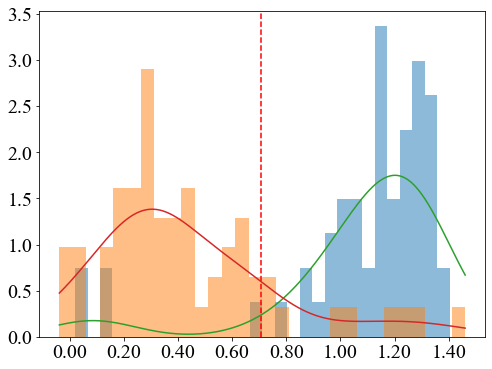

In [77]:
BFs_values = df['CIgreen'].values
best_threshold=0.7049

# KDE估计  
bw_method = 'silverman'  
kde_0 = gaussian_kde(BFs_values[true_labels == 0], bw_method=bw_method)  
kde_1 = gaussian_kde(BFs_values[true_labels == 1], bw_method=bw_method)  
  
# 为了绘制KDE曲线，我们需要一个x值的范围  
x_range = np.linspace(min(BFs_values), max(BFs_values), 1000)  # 创建一个x值的范围  
  
# 可视化  
plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'Times New Roman'  
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
plt.hist(BFs_values[true_labels == 0], bins=30, alpha=0.5, label='Health', density=True)    
plt.hist(BFs_values[true_labels == 1], bins=30, alpha=0.5, label='Diseased', density=True)    
plt.axvline(x=best_threshold, color='r', linestyle='--', label='Optimal Threshold')   
  
# 在x_range上计算KDE并绘制  
plt.plot(x_range, kde_0(x_range), label='KDE for Health')    
plt.plot(x_range, kde_1(x_range), label='KDE for Diseased')   

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 设置x轴和y轴的标签格式化为两位小数  
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x)))  
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:.1f}'.format(y)))  
#plt.legend(fontsize=14)    
plt.show()

## EFs特征构建 

In [9]:
# 定义要检查的特征名称列表  
features = ['NDVI', 'NDRE', 'ARI', 'CIgreen', 'CIRE', 'Blue', 'Green', 'Red', 'NIR', 'Red edge']  
  
# 初始化一个空列表来存储满足条件的特征名称  
features_with_lower_density_in_healthy = []  
  
# 遍历特征名称列表  
for feature in features:  
    # 提取当前特征的值和标签  
    values = df[feature].values  
    labels = df['Labels'].values  
      
    # 根据标签分别计算KDE  
    kde_healthy = gaussian_kde(values[labels == 0])  
    kde_diseased = gaussian_kde(values[labels == 1])  
      
    # 定义x的范围（这里使用当前特征的最小值和最大值）  
    x = np.linspace(min(values), max(values), 1000)  
      
    # 计算每个点的KDE值  
    density_healthy = kde_healthy(x)  
    density_diseased = kde_diseased(x)  
      
    # 找到KDE的最大值及其对应的x值  
    max_density_healthy, idx_healthy = np.max(density_healthy), np.argmax(density_healthy)  
    max_density_diseased, idx_diseased = np.max(density_diseased), np.argmax(density_diseased)  
    x_value_healthy = x[idx_healthy]  
    x_value_diseased = x[idx_diseased] 
      
    # 如果健康状态下的最大核密度小于染病状态下的最大核密度  
    if x_value_healthy < x_value_diseased:  
        # 将特征名称添加到列表中  
        features_with_lower_density_in_healthy.append(feature)  
    
print(f"满足条件的特征有: {features_with_lower_density_in_healthy}")

满足条件的特征有: ['Blue', 'Green', 'Red', 'Red edge']


In [10]:
thresholds = {    
    'ARI': 0.8291,    
    'CIgreen': 0.7049,    
    'CIRE': 0.3009,    
    'NDVI': 0.4804,    
    'NDRE': 0.1192,    
    'Blue': 0.2774,     
    'Green': 0.4040,     
    'Red': 0.2203,  
    'NIR': 0.6307,    
    'Red edge': 0.5048,   
}     

for feature, threshold in thresholds.items():    
    # 根据阈值创建一个新的列，名称是原特征名后加'_EF'    
    # 使用np.where来实现条件判断    
    df2[f'{feature}_EF'] = np.where(  
        df2[feature] > threshold if feature in features_with_lower_density_in_healthy else df2[feature] < threshold,   
        1,   
        0  
    )

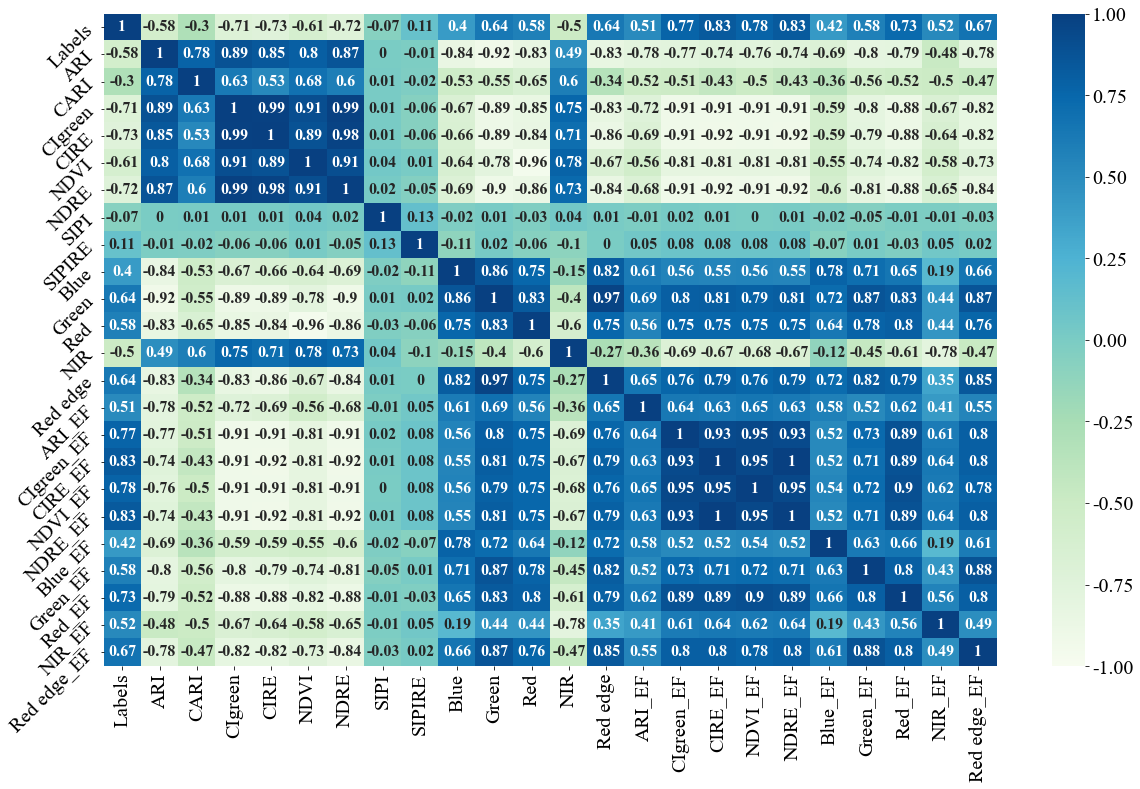

In [45]:
plt.rcParams['font.family'] = 'Times New Roman'
# 使用热度图可视化这个相关系数矩阵
plt.figure(figsize=(20,12))# 设置画布大小
# annot默认为False，当annot为True时，会在heatmap中每个方格写入数据，更便于查看
sns.heatmap(df2.corr().round(2), annot=True, annot_kws={'size':16,'weight':'bold'}, vmax=1.0, vmin=-1.0, cmap="GnBu")
plt.yticks(fontsize=20,rotation=45)
plt.xticks(fontsize=20,rotation=90)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)

# 基于BFs（13）和EFs（10）的实验结果

In [11]:
# 基于BFs（13） + EFs（10）的RF、SVM和GNB的实验结果
X = df2.drop(['Labels'], axis = 1).values
y = df2['Labels'].values

oa_rf_list=[]
pre_rf_list=[]
rc_rf_list=[]
f1_rf_list=[]

oa_svm_list=[]
pre_svm_list=[]
rc_svm_list=[]
f1_svm_list=[]

oa_gnb_list=[]
pre_gnb_list=[]
rc_gnb_list=[]
f1_gnb_list=[]

for i in range(50): 
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  
    # 训练分类器（以随机森林为例）并输出预测结果  
    rf = RandomForestClassifier(random_state=42)  
    rf.fit(X_train, y_train)  
    y_pred_rf = rf.predict(X_test)  
  
    oa_rf=accuracy_score(y_test,y_pred_rf).round(5)
    oa_rf_list.append(oa_rf) 
    pre_rf=precision_score(y_test,y_pred_rf).round(5)
    pre_rf_list.append(pre_rf)
    rc_rf=recall_score(y_test,y_pred_rf).round(5)
    rc_rf_list.append(rc_rf)  
    f1_rf=f1_score(y_test,y_pred_rf).round(5)
    f1_rf_list.append(f1_rf)  
    
    SVM = svm.SVC(random_state=42)
    SVM.fit(X_train, y_train)
    y_pred_svm=SVM.predict(X_test)
    
    oa_svm=accuracy_score(y_test,y_pred_svm).round(5)
    oa_svm_list.append(oa_svm)
    pre_svm=precision_score(y_test,y_pred_svm).round(5)
    pre_svm_list.append(pre_svm)
    rc_svm=recall_score(y_test,y_pred_svm).round(5)
    rc_svm_list.append(rc_svm)  
    f1_svm=f1_score(y_test,y_pred_svm).round(5)
    f1_svm_list.append(f1_svm) 

    gnb = GaussianNB()  
    gnb.fit(X_train, y_train)
    y_pred_gnb=gnb.predict(X_test)
    
    oa_gnb=accuracy_score(y_test,y_pred_gnb).round(5)
    oa_gnb_list.append(oa_gnb)
    pre_gnb=precision_score(y_test,y_pred_gnb).round(5)
    pre_gnb_list.append(pre_gnb)
    rc_gnb=recall_score(y_test,y_pred_gnb).round(5)
    rc_gnb_list.append(rc_gnb)  
    f1_gnb=f1_score(y_test,y_pred_gnb).round(5)
    f1_gnb_list.append(f1_gnb) 
    
oa_rf_mean = np.mean(oa_rf_list).round(4)
pre_rf_mean = np.mean(pre_rf_list).round(4)
rc_rf_mean = np.mean(rc_rf_list).round(4)
f1_rf_mean = np.mean(f1_rf_list).round(4)
print('随机森林模型的准确率为',oa_rf_mean)
print('随机森林模型的精准率为',pre_rf_mean)
print('随机森林模型的召回率为',rc_rf_mean)
print('随机森林模型的F1_Score为',f1_rf_mean)
print("———————————————————————————————————————————————")

oa_svm_mean = np.mean(oa_svm_list).round(4)  
pre_svm_mean = np.mean(pre_svm_list).round(4)
rc_svm_mean = np.mean(rc_svm_list).round(4) 
f1_svm_mean = np.mean(f1_svm_list).round(4)
print('SVM模型的准确率为',oa_svm_mean)
print('SVM模型的精准率为',pre_svm_mean)
print('SVM模型的召回率为',rc_svm_mean)
print('SVM模型的F1_Score为',f1_svm_mean)
print("———————————————————————————————————————————————")

oa_gnb_mean = np.mean(oa_gnb_list).round(4)  
pre_gnb_mean = np.mean(pre_gnb_list).round(4)
rc_gnb_mean = np.mean(rc_gnb_list).round(4)  
f1_gnb_mean = np.mean(f1_gnb_list).round(4)
print('GNB模型的准确率为',oa_gnb_mean)
print('GNB模型的精准率为',pre_gnb_mean)
print('GNB模型的召回率为',rc_gnb_mean)
print('GNB模型的F1_Score为',f1_gnb_mean)
print("———————————————————————————————————————————————")


随机森林模型的准确率为 0.9072
随机森林模型的精准率为 0.9217
随机森林模型的召回率为 0.8944
随机森林模型的F1_Score为 0.9063
———————————————————————————————————————————————
SVM模型的准确率为 0.9139
SVM模型的精准率为 0.9322
SVM模型的召回率为 0.8968
SVM模型的F1_Score为 0.9127
———————————————————————————————————————————————
GNB模型的准确率为 0.8972
GNB模型的精准率为 0.9286
GNB模型的召回率为 0.8675
GNB模型的F1_Score为 0.8949
———————————————————————————————————————————————


In [49]:
from scipy.stats import ttest_ind, chi2_contingency
import numpy as np

# 计算显著性检验（t 检验）
def perform_t_tests(metric_rf, metric_svm, metric_gnb, metric_name):
    print(f"Performing t-tests for {metric_name}:")
    # RF vs SVM
    t_stat, p_value = ttest_ind(metric_rf, metric_svm)
    print(f"RF vs SVM: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")
    # RF vs GNB
    t_stat, p_value = ttest_ind(metric_rf, metric_gnb)
    print(f"RF vs GNB: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")
    # SVM vs GNB
    t_stat, p_value = ttest_ind(metric_svm, metric_gnb)
    print(f"SVM vs GNB: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")
    print("———————————————————————————————————————————————")

# 构造用于卡方检验的分类表现表
def prepare_contingency_table(y_true, y_pred_list, model_name):
    # 假设预测值是 [0, 1] 分类问题
    true_positive = sum((y_true == 1) & (y_pred_list == 1))
    true_negative = sum((y_true == 0) & (y_pred_list == 0))
    false_positive = sum((y_true == 0) & (y_pred_list == 1))
    false_negative = sum((y_true == 1) & (y_pred_list == 0))
    return [[true_positive, false_positive], [false_negative, true_negative]]

# 卡方检验
def perform_chi2_test(y_true, y_pred_rf, y_pred_svm, y_pred_gnb):
    print("Performing Chi-Square Tests:")
    contingency_rf = prepare_contingency_table(y_true, y_pred_rf, "RF")
    contingency_svm = prepare_contingency_table(y_true, y_pred_svm, "SVM")
    contingency_gnb = prepare_contingency_table(y_true, y_pred_gnb, "GNB")
    
    # RF
    chi2, p, dof, _ = chi2_contingency(contingency_rf)
    print(f"RF: chi2 = {chi2:.4f}, p-value = {p:.4f}, dof = {dof}")
    # SVM
    chi2, p, dof, _ = chi2_contingency(contingency_svm)
    print(f"SVM: chi2 = {chi2:.4f}, p-value = {p:.4f}, dof = {dof}")
    # GNB
    chi2, p, dof, _ = chi2_contingency(contingency_gnb)
    print(f"GNB: chi2 = {chi2:.4f}, p-value = {p:.4f}, dof = {dof}")
    print("———————————————————————————————————————————————")

# 执行 t 检验
perform_t_tests(oa_rf_list, oa_svm_list, oa_gnb_list, "Overall Accuracy (OA)")
perform_t_tests(pre_rf_list, pre_svm_list, pre_gnb_list, "Precision")
perform_t_tests(rc_rf_list, rc_svm_list, rc_gnb_list, "Recall")
perform_t_tests(f1_rf_list, f1_svm_list, f1_gnb_list, "F1-Score")

# 卡方检验基于一个随机分割（例如第 1 次）
perform_chi2_test(y_test, y_pred_rf, y_pred_svm, y_pred_gnb)

Performing t-tests for Overall Accuracy (OA):
RF vs SVM: t-stat = -0.8203, p-value = 0.4140
RF vs GNB: t-stat = 1.1756, p-value = 0.2426
SVM vs GNB: t-stat = 1.9625, p-value = 0.0525
———————————————————————————————————————————————
Performing t-tests for Precision:
RF vs SVM: t-stat = -0.9812, p-value = 0.3289
RF vs GNB: t-stat = -0.6155, p-value = 0.5396
SVM vs GNB: t-stat = 0.3257, p-value = 0.7454
———————————————————————————————————————————————
Performing t-tests for Recall:
RF vs SVM: t-stat = -0.1943, p-value = 0.8464
RF vs GNB: t-stat = 2.0503, p-value = 0.0430
SVM vs GNB: t-stat = 2.2368, p-value = 0.0276
———————————————————————————————————————————————
Performing t-tests for F1-Score:
RF vs SVM: t-stat = -0.7381, p-value = 0.4622
RF vs GNB: t-stat = 1.2565, p-value = 0.2119
SVM vs GNB: t-stat = 1.9645, p-value = 0.0523
———————————————————————————————————————————————
Performing Chi-Square Tests:
RF: chi2 = 15.7500, p-value = 0.0001, dof = 1
SVM: chi2 = 18.5977, p-value = 0.0000, d

# 可视化RF的特征重要性

[0.01804366 0.01560528 0.11809989 0.08371238 0.15133611 0.14444294
 0.0285711  0.02269383 0.01985168 0.0392091  0.05714171 0.02134107
 0.03990502 0.00072903 0.01188165 0.07895004 0.04636313 0.09427824
 0.00103739 0.         0.00111177 0.00133004 0.00436494]


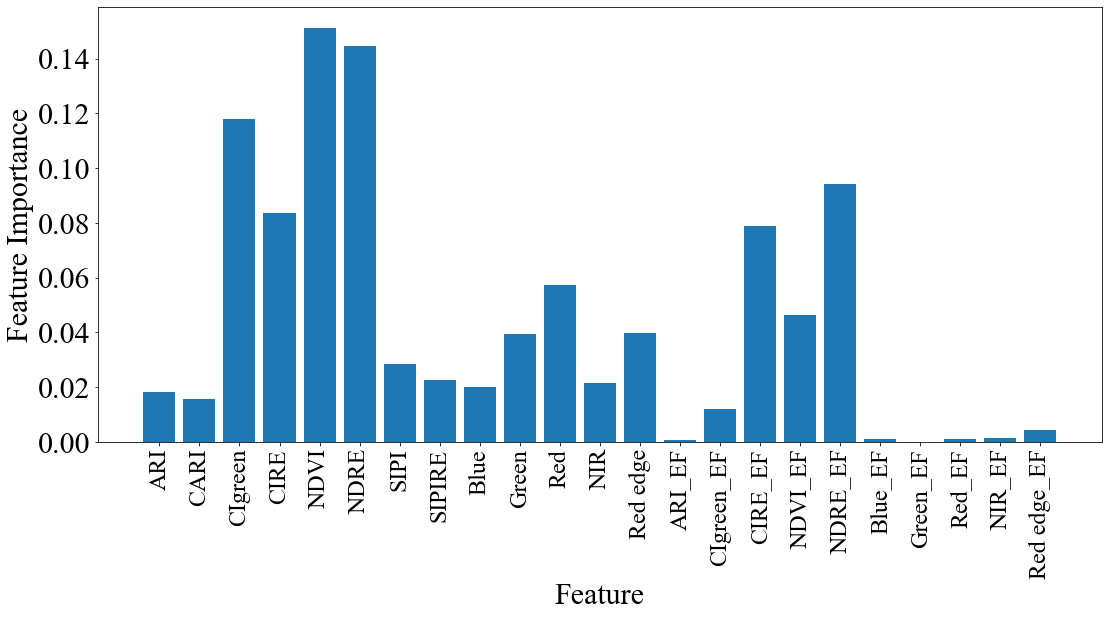

In [50]:
data = df2.drop(['Labels'], axis = 1)

plt.rcParams['font.family'] = 'Times New Roman' 
# 计算特征重要性  
importances = rf.feature_importances_  
print(importances)
std = pd.Series(importances).std()  
indices = pd.Series(range(X.shape[1]))  
  
# 绘制特征重要性的图像  
plt.figure(figsize=(18, 8))  
# plt.title("Feature Importances of RF", fontsize=30)  
plt.bar(indices, importances)  
plt.xticks(indices, data.columns[indices], rotation=90, fontsize=24) 
plt.yticks(fontsize=30)
plt.xlabel("Feature", fontsize=30)  
plt.ylabel("Feature Importance", fontsize=30)  
plt.show()

In [51]:
# 创建数据框  
df_importances = pd.DataFrame({'Feature': data.columns[indices], 'Importance': importances})  
  
# 将数据框保存为CSV文件  
df_importances.to_csv('Banana_RF_feature_importances_EN.csv', index=False)

# 模型Ⅱ 

In [12]:
# 模型Ⅱ
df3 = df1.copy() # BFs（10）
df4 = df2.copy() # EFs（10）

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Labels    120 non-null    int64  
 1   ARI       120 non-null    float64
 2   CARI      120 non-null    float64
 3   CIgreen   120 non-null    float64
 4   CIRE      120 non-null    float64
 5   NDVI      120 non-null    float64
 6   NDRE      120 non-null    float64
 7   SIPI      120 non-null    float64
 8   SIPIRE    120 non-null    float64
 9   Blue      120 non-null    float64
 10  Green     120 non-null    float64
 11  Red       120 non-null    float64
 12  NIR       120 non-null    float64
 13  Red edge  120 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.2 KB


In [13]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Labels       120 non-null    int64  
 1   ARI          120 non-null    float64
 2   CARI         120 non-null    float64
 3   CIgreen      120 non-null    float64
 4   CIRE         120 non-null    float64
 5   NDVI         120 non-null    float64
 6   NDRE         120 non-null    float64
 7   SIPI         120 non-null    float64
 8   SIPIRE       120 non-null    float64
 9   Blue         120 non-null    float64
 10  Green        120 non-null    float64
 11  Red          120 non-null    float64
 12  NIR          120 non-null    float64
 13  Red edge     120 non-null    float64
 14  ARI_EF       120 non-null    int32  
 15  CIgreen_EF   120 non-null    int32  
 16  CIRE_EF      120 non-null    int32  
 17  NDVI_EF      120 non-null    int32  
 18  NDRE_EF      120 non-null    int32  
 19  Blue_EF 

## BFs（10）实验结果

In [16]:
# 基于BFs（5个反射率特征和5个植被指数特征，共10个特征）的RF、SVM和GNB的实验结果
X = df3.drop(['Labels', 'CARI', 'SIPI', 'SIPIRE'], axis = 1).values
y = df3['Labels'].values

oa_rf_list=[]
pre_rf_list=[]
rc_rf_list=[]
f1_rf_list=[]

oa_svm_list=[]
pre_svm_list=[]
rc_svm_list=[]
f1_svm_list=[]

oa_gnb_list=[]
pre_gnb_list=[]
rc_gnb_list=[]
f1_gnb_list=[]

for i in range(50): 
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  
    # 训练分类器（以随机森林为例）并输出预测结果  
    rf = RandomForestClassifier(random_state=42)  
    rf.fit(X_train, y_train)  
    y_pred_rf = rf.predict(X_test)  
  
    oa_rf=accuracy_score(y_test,y_pred_rf).round(5)
    oa_rf_list.append(oa_rf) 
    pre_rf=precision_score(y_test,y_pred_rf).round(5)
    pre_rf_list.append(pre_rf)
    rc_rf=recall_score(y_test,y_pred_rf).round(5)
    rc_rf_list.append(rc_rf)  
    f1_rf=f1_score(y_test,y_pred_rf).round(5)
    f1_rf_list.append(f1_rf)  
    
    SVM = svm.SVC(random_state=42)
    SVM.fit(X_train, y_train)
    y_pred_svm=SVM.predict(X_test)
    
    oa_svm=accuracy_score(y_test,y_pred_svm).round(5)
    oa_svm_list.append(oa_svm)
    pre_svm=precision_score(y_test,y_pred_svm).round(5)
    pre_svm_list.append(pre_svm)
    rc_svm=recall_score(y_test,y_pred_svm).round(5)
    rc_svm_list.append(rc_svm)  
    f1_svm=f1_score(y_test,y_pred_svm).round(5)
    f1_svm_list.append(f1_svm) 

    gnb = GaussianNB()  
    gnb.fit(X_train, y_train)
    y_pred_gnb=gnb.predict(X_test)
    
    oa_gnb=accuracy_score(y_test,y_pred_gnb).round(5)
    oa_gnb_list.append(oa_gnb)
    pre_gnb=precision_score(y_test,y_pred_gnb).round(5)
    pre_gnb_list.append(pre_gnb)
    rc_gnb=recall_score(y_test,y_pred_gnb).round(5)
    rc_gnb_list.append(rc_gnb)  
    f1_gnb=f1_score(y_test,y_pred_gnb).round(5)
    f1_gnb_list.append(f1_gnb) 
    
oa_rf_mean = np.mean(oa_rf_list).round(4)
pre_rf_mean = np.mean(pre_rf_list).round(4)
rc_rf_mean = np.mean(rc_rf_list).round(4)
f1_rf_mean = np.mean(f1_rf_list).round(4)
print('随机森林模型的准确率为',oa_rf_mean)
print('随机森林模型的精准率为',pre_rf_mean)
print('随机森林模型的召回率为',rc_rf_mean)
print('随机森林模型的F1_Score为',f1_rf_mean)
print("———————————————————————————————————————————————")

oa_svm_mean = np.mean(oa_svm_list).round(4)  
pre_svm_mean = np.mean(pre_svm_list).round(4)
rc_svm_mean = np.mean(rc_svm_list).round(4) 
f1_svm_mean = np.mean(f1_svm_list).round(4)
print('SVM模型的准确率为',oa_svm_mean)
print('SVM模型的精准率为',pre_svm_mean)
print('SVM模型的召回率为',rc_svm_mean)
print('SVM模型的F1_Score为',f1_svm_mean)
print("———————————————————————————————————————————————")

oa_gnb_mean = np.mean(oa_gnb_list).round(4)  
pre_gnb_mean = np.mean(pre_gnb_list).round(4)
rc_gnb_mean = np.mean(rc_gnb_list).round(4)  
f1_gnb_mean = np.mean(f1_gnb_list).round(4)
print('GNB模型的准确率为',oa_gnb_mean)
print('GNB模型的精准率为',pre_gnb_mean)
print('GNB模型的召回率为',rc_gnb_mean)
print('GNB模型的F1_Score为',f1_gnb_mean)

随机森林模型的准确率为 0.8939
随机森林模型的精准率为 0.9038
随机森林模型的召回率为 0.8881
随机森林模型的F1_Score为 0.8934
———————————————————————————————————————————————
SVM模型的准确率为 0.9056
SVM模型的精准率为 0.9163
SVM模型的召回率为 0.8969
SVM模型的F1_Score为 0.905
———————————————————————————————————————————————
GNB模型的准确率为 0.8861
GNB模型的精准率为 0.9286
GNB模型的召回率为 0.8426
GNB模型的F1_Score为 0.8815


## EFs（10）实验结果

In [18]:
# 基于EFs（5个反射率EFs和5个植被指数EFs，共10个特征）的RF、SVM和GNB的实验结果
X = df4.drop(['Labels', 'CARI', 'SIPI', 'SIPIRE', 'CIgreen', 'CIRE', 'ARI', 'NDVI', 'NDRE', 'Blue', 'Red', 'Green', 'NIR', 'Red edge'], axis = 1).values
y = df4['Labels'].values

oa_rf_list=[]
pre_rf_list=[]
rc_rf_list=[]
f1_rf_list=[]

oa_svm_list=[]
pre_svm_list=[]
rc_svm_list=[]
f1_svm_list=[]

oa_gnb_list=[]
pre_gnb_list=[]
rc_gnb_list=[]
f1_gnb_list=[]

for i in range(50): 
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  
    # 训练分类器（以随机森林为例）并输出预测结果  
    rf = RandomForestClassifier(random_state=42)  
    rf.fit(X_train, y_train)  
    y_pred_rf = rf.predict(X_test)  
  
    oa_rf=accuracy_score(y_test,y_pred_rf).round(5)
    oa_rf_list.append(oa_rf) 
    pre_rf=precision_score(y_test,y_pred_rf).round(5)
    pre_rf_list.append(pre_rf)
    rc_rf=recall_score(y_test,y_pred_rf).round(5)
    rc_rf_list.append(rc_rf)  
    f1_rf=f1_score(y_test,y_pred_rf).round(5)
    f1_rf_list.append(f1_rf)  
    
    SVM = svm.SVC(random_state=42)
    SVM.fit(X_train, y_train)
    y_pred_svm=SVM.predict(X_test)
    
    oa_svm=accuracy_score(y_test,y_pred_svm).round(5)
    oa_svm_list.append(oa_svm)
    pre_svm=precision_score(y_test,y_pred_svm).round(5)
    pre_svm_list.append(pre_svm)
    rc_svm=recall_score(y_test,y_pred_svm).round(5)
    rc_svm_list.append(rc_svm)  
    f1_svm=f1_score(y_test,y_pred_svm).round(5)
    f1_svm_list.append(f1_svm) 

    gnb = GaussianNB()  
    gnb.fit(X_train, y_train)
    y_pred_gnb=gnb.predict(X_test)
    
    oa_gnb=accuracy_score(y_test,y_pred_gnb).round(5)
    oa_gnb_list.append(oa_gnb)
    pre_gnb=precision_score(y_test,y_pred_gnb).round(5)
    pre_gnb_list.append(pre_gnb)
    rc_gnb=recall_score(y_test,y_pred_gnb).round(5)
    rc_gnb_list.append(rc_gnb)  
    f1_gnb=f1_score(y_test,y_pred_gnb).round(5)
    f1_gnb_list.append(f1_gnb) 
    
oa_rf_mean = np.mean(oa_rf_list).round(4)
pre_rf_mean = np.mean(pre_rf_list).round(4)
rc_rf_mean = np.mean(rc_rf_list).round(4)
f1_rf_mean = np.mean(f1_rf_list).round(4)
print('随机森林模型的准确率为',oa_rf_mean)
print('随机森林模型的精准率为',pre_rf_mean)
print('随机森林模型的召回率为',rc_rf_mean)
print('随机森林模型的F1_Score为',f1_rf_mean)
print("———————————————————————————————————————————————")

oa_svm_mean = np.mean(oa_svm_list).round(4)  
pre_svm_mean = np.mean(pre_svm_list).round(4)
rc_svm_mean = np.mean(rc_svm_list).round(4) 
f1_svm_mean = np.mean(f1_svm_list).round(4)
print('SVM模型的准确率为',oa_svm_mean)
print('SVM模型的精准率为',pre_svm_mean)
print('SVM模型的召回率为',rc_svm_mean)
print('SVM模型的F1_Score为',f1_svm_mean)
print("———————————————————————————————————————————————")

oa_gnb_mean = np.mean(oa_gnb_list).round(4)  
pre_gnb_mean = np.mean(pre_gnb_list).round(4)
rc_gnb_mean = np.mean(rc_gnb_list).round(4)  
f1_gnb_mean = np.mean(f1_gnb_list).round(4)
print('GNB模型的准确率为',oa_gnb_mean)
print('GNB模型的精准率为',pre_gnb_mean)
print('GNB模型的召回率为',rc_gnb_mean)
print('GNB模型的F1_Score为',f1_gnb_mean)

随机森林模型的准确率为 0.9083
随机森林模型的精准率为 0.9231
随机森林模型的召回率为 0.8958
随机森林模型的F1_Score为 0.9076
———————————————————————————————————————————————
SVM模型的准确率为 0.9144
SVM模型的精准率为 0.9322
SVM模型的召回率为 0.8978
SVM模型的F1_Score为 0.9133
———————————————————————————————————————————————
GNB模型的准确率为 0.9078
GNB模型的精准率为 0.9308
GNB模型的召回率为 0.8855
GNB模型的F1_Score为 0.9058


In [19]:
from sklearn.svm import SVR

svr_model_10 = SVR(kernel='rbf')
svr_model_10.fit(X_train, y_train)

SVR()

In [21]:
import pickle

SavePath = r"D:\program\GX\svr_model_10.pickle"

#  5.保存模型
#以二进制的方式打开文件：
file = open(SavePath, "wb")
#将模型写入文件：
pickle.dump(svr_model_10, file)
#最后关闭文件：
file.close()

In [23]:
#读取tif数据集
def readTif(fileName):
    dataset = gdal.Open(fileName)
    if dataset == None:
        print(fileName+"文件无法打开")
    return dataset

#保存tif文件函数
def writeTiff(im_data, im_geotrans, im_proj, path):  
    # 确定像素数据类型（GDAL 数据类型）  
    if im_data.dtype == np.int8:  
        datatype = gdal.GDT_Byte  
    elif im_data.dtype == np.int16:  
        datatype = gdal.GDT_Int16  
    elif im_data.dtype == np.float32:  
        datatype = gdal.GDT_Float32  
    elif im_data.dtype == np.float64:  
        datatype = gdal.GDT_Float64  
    else:  
        raise ValueError(f"Unsupported data type: {im_data.dtype}")  
  
    # 根据数据的维度确定波段数  
    if len(im_data.shape) == 3:  
        im_bands, im_height, im_width = im_data.shape  
    elif len(im_data.shape) == 2:  
        im_data = np.expand_dims(im_data, axis=0)  # 将二维数组扩展为三维，增加一个波段维度  
        im_bands, im_height, im_width = im_data.shape  
    else:  
        raise ValueError("Input data should be 2D or 3D")  
  
    # 创建文件  
    driver = gdal.GetDriverByName("GTiff")  
    dataset = driver.Create(path, im_width, im_height, im_bands, datatype)  
  
    if dataset is not None:  
        dataset.SetGeoTransform(im_geotrans)  # 写入仿射变换参数  
        dataset.SetProjection(im_proj)  # 写入投影  
  
        for i in range(im_bands):  
            dataset.GetRasterBand(i + 1).WriteArray(im_data[i])  
  
        # 刷新数据到磁盘，并关闭数据集  
        dataset.FlushCache()  
        
        del dataset  
    else:  
        raise ValueError("Could not create the GeoTIFF file")
    
RFpath = r"D:\program\GX\svr_model_10.pickle"
Landset_Path = r"D:\program\GX\Guangxi_feaures_10EF.tif"
SavePath = r"D:\program\GX\svr_model_10_mapping.tif"

dataset = readTif(Landset_Path)
Tif_width = dataset.RasterXSize #栅格矩阵的列数
Tif_height = dataset.RasterYSize #栅格矩阵的行数
Tif_geotrans = dataset.GetGeoTransform()#获取仿射矩阵信息
Tif_proj = dataset.GetProjection()#获取投影信息
Landset_data = dataset.ReadAsArray(0,0,Tif_width,Tif_height)
Landset_data = Landset_data.astype(np.float16)
print(Landset_data.shape)

################################################调用保存好的模型
#以读二进制的方式打开文件
file = open(RFpath, "rb")
#把模型从文件中读取出来
rf_model = pickle.load(file)
#关闭文件
file.close()
################################################用读入的模型进行预测
#  在与测试前要调整一下数据的格式
data = np.zeros((Landset_data.shape[0],Landset_data.shape[1]*Landset_data.shape[2]))
for i in range(Landset_data.shape[0]):
    data[i] = Landset_data[i].flatten()
data = data.swapaxes(0,1)
#  对调整好格式的数据进行预测
pred = rf_model.predict(data)
print(pred)
#  同样地，我们对预测好的数据调整为我们图像的格式
pred = pred.reshape(Landset_data.shape[1],Landset_data.shape[2])
pred = pred.astype(np.float32)

#  将结果写到tif图像里
writeTiff(pred,Tif_geotrans,Tif_proj,SavePath)

(10, 6092, 8233)
[0.61084399 0.61084399 0.61084399 ... 0.61084399 0.61084399 0.61084399]


In [13]:
# plt.rcParams['font.family'] = 'Times New Roman'  
# plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# plt.figure(figsize=(5,4))

# # 设置cbar_kws以格式化刻度标签  
# cbar_kws = dict(format='%.2f')  # 保留两位小数  

# sns.kdeplot(x="Labels",y="CIgreen_CF",data=df,shade=True,cbar=True,cmap='Greens',cbar_kws=cbar_kws)

# #plt.yticks([0,1], fontsize=25)
# plt.yticks(fontsize=25)
# # 自定义x轴刻度标签，只显示"健康"和"染病"  
# unique_labels = df['Labels'].unique()  # 获取"Labels"列的唯一值  
# label_dict = {0: 'Health', 1: 'Diseased'}  # 创建一个字典来映射要显示的标签  
# plt.xticks(range(len(unique_labels)), [label_dict[label] for label in unique_labels], fontsize=25)
# plt.xlabel("",fontsize=25)
# plt.ylabel("CIgreen",fontsize=25)
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:.1f}'.format(y))) 
# cax = plt.gcf().axes[-1]
# cax.tick_params(labelsize=25)